## K-means cluster analysis based on SST and bbp Lidar

**Cluster analysis based on SST and bbp (proxy for biomass) interannual anomalies in the Southern Ocean between 2006 and 20017**

Import packages and MATLAB anomaly data

In [10]:
import scipy.io as sio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
# Read Climatology
data = sio.loadmat('/Users/laaq/Documents/MATLAB/SOCCOM/Lidar_anomalies/lidarclim.mat')
#data['lidarclim'][('lat')][0,11][64,359] access the deepest data level
lidarclim = data['lidarclim']
# Read annually- and monthly-resolved data
data = sio.loadmat('/Users/laaq/Documents/MATLAB/SOCCOM/Lidar_anomalies/lidar_annual.mat')
#lidar_annual[('data')][0,1][('lat')][0,11][64,359] access the deepest data level
lidar_annual = data['lidar_annual']
# Load Alex SST data
sst_data = sio.loadmat('/Users/laaq/Documents/MATLAB/SOCCOM/Lidar_anomalies/sst_satellite_200606-201704.mat')

**Unpack lidar data and store it as "lidar_data"**

In [11]:
def unpack_lidar_vars(lidarclim,lidar_annual):
    lidar_anomaly_bbp = np.zeros((65,360,12,12))
    lidar_anomaly_bbp[:] = np.nan
    lidar_anomaly_cphyto = np.zeros((65,360,12,12))
    lidar_anomaly_cphyto[:] = np.nan
    lidar_lat = np.zeros((65,360,12,12))
    lidar_lat[:] = np.nan
    lidar_lon = np.zeros((65,360,12,12))
    lidar_lon[:] = np.nan
    lidar_bbp= np.zeros((65,360,12,12))
    lidar_bbp[:] = np.nan
    lidar_cphyto= np.zeros((65,360,12,12))
    lidar_cphyto[:] = np.nan
    lidar_numobs = np.zeros((65,360,12,12))
    lidar_numobs[:] = np.nan
    lidar_month = np.zeros((65,360,12,12))
    lidar_month[:] = np.nan
    lidar_year = np.zeros((65,360,12,12))
    lidar_year[:] = np.nan


# Re-store data as 4D array
    for m in range(12):
        for n in range(12):
            lidar_anomaly_bbp[:,:,m,n] = lidar_annual[('data')][0,m][('bbp')][0,n] - lidarclim['bbp'][0,n]
            lidar_anomaly_cphyto[:,:,m,n] = lidar_annual[('data')][0,m][('cphyto')][0,n] - lidarclim['cphyto'][0,n]
            lidar_lat[:,:,m,n] = lidar_annual[('data')][0,m][('lat')][0,n]
            lidar_lon[:,:,m,n] = lidar_annual[('data')][0,m][('lon')][0,n]
            lidar_bbp[:,:,m,n] = lidar_annual[('data')][0,m][('bbp')][0,n]
            lidar_cphyto[:,:,m,n] = lidar_annual[('data')][0,m][('cphyto')][0,n]
            lidar_numobs[:,:,m,n] = lidar_annual[('data')][0,m][('numobs')][0,n]
            lidar_month[:,:,m,n] = lidar_annual[('data')][0,m][('month')][0,n]
            lidar_year[:,:,m,n] = lidar_annual[('year')][0,m]

# Reshape data
    lidar_anomaly_bbp = np.reshape(lidar_anomaly_bbp, (65,360,144))
    lidar_anomaly_cphyto = np.reshape(lidar_anomaly_cphyto, (65,360,144))
    lidar_lat = np.reshape(lidar_lat, (65,360,144))
    lidar_lon = np.reshape(lidar_lon, (65,360,144))
    lidar_bbp = np.reshape(lidar_bbp, (65,360,144))
    lidar_cphyto = np.reshape(lidar_cphyto, (65,360,144))
    lidar_numobs = np.reshape(lidar_numobs, (65,360,144))
    lidar_month = np.reshape(lidar_month, (65,360,144))
    lidar_year = np.reshape(lidar_year, (65,360,144))

# Rotate and flip data
    lidar_anomaly_bbp = np.flipud(np.rot90(lidar_anomaly_bbp,1))
    lidar_anomaly_cphyto = np.flipud(np.rot90(lidar_anomaly_cphyto,1))
    lidar_lat = np.flipud(np.rot90(lidar_lat,1))
    lidar_lon = np.flipud(np.rot90(lidar_lon,1))
    lidar_bbp = np.flipud(np.rot90(lidar_bbp,1))
    lidar_cphyto = np.flipud(np.rot90(lidar_cphyto,1))
    lidar_numobs = np.flipud(np.rot90(lidar_numobs,1))
    lidar_month = np.flipud(np.rot90(lidar_month,1))
    lidar_year = np.flipud(np.rot90(lidar_year,1))
    
# Make monthly average to check
    #dummy = np.zeros(144)
    #for n in range(144):
     #   dummy[n] = np.nanmean(lidar_anomaly_bbp[:,:,n]) 
      #  plt.plot(dummy)
       # plt.show()

# STORE LIDAR ARRAYS IN DICTIONARY
    lidar_data = {}
    lidar_data["lidar_anomaly_bbp"] = lidar_anomaly_bbp[:,:,5:-8]
    lidar_data["lidar_anomaly_cphyto"] = lidar_anomaly_cphyto[:,:,5:-8]
    lidar_data["lidar_lat"] = lidar_lat[:,:,5:-8]
    lidar_data["lidar_lon"] = lidar_lon[:,:,5:-8]
    lidar_data["lidar_bbp"] = lidar_bbp[:,:,5:-8]
    lidar_data["lidar_cphyto"] = lidar_cphyto[:,:,5:-8]
    lidar_data["lidar_numobs"] = lidar_numobs[:,:,5:-8]
    lidar_data["lidar_month"] = lidar_month[:,:,5:-8]
    lidar_data["lidar_year"] = lidar_year[:,:,5:-8]
    return lidar_data

lidar_data = unpack_lidar_vars(lidarclim,lidar_annual)

**Compute a plot Southern Ocean correlation map between SST and bbp anomalies**

In [13]:
# Compute correlation
def lidar_correlation(sst_data,lidar_data):
    r = np.zeros((360,65))
    r[:] = np.nan
    for x in range(360):
        for y in range(65):
            A = lidar_data['lidar_anomaly_bbp'][x,y,:]
            B = sst_data['sst_anom'][x,y,:]
            matrix = np.stack((A,B),1)
            df = pd.DataFrame(matrix, columns = ['A','B'])
            rs = df.corr()
            r[x,y] = rs['A'][1]
    return r
r = lidar_correlation(sst_data,lidar_data)

<Figure size 432x288 with 0 Axes>

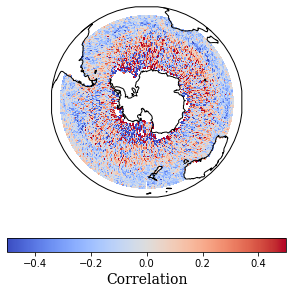

In [14]:
#### PLOTING Southern Ocean anomalies correlation map
import cartopy
import cartopy.crs as ccrs
lon = sst_data['lon']
lat = sst_data['lat']
plt.set_cmap('coolwarm')
data_trans =  ccrs.PlateCarree()
fig = plt.figure(figsize=(5,5),facecolor='w')
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=0,central_latitude=-90.0))
#ax.set_extent([-180, 180, -90, -25.5], crs=ccrs.PlateCarree())
#ax.set_extent([-180, 180, -90, -25.5], crs=ccrs.PlateCarree())
ax.coastlines()
pp = ax.pcolormesh(lon, lat, r, transform=data_trans,vmin=-0.5, vmax=0.5)
cbar = plt.colorbar(pp, orientation='horizontal')
cbar.set_label(label='Correlation',size=14, family='serif')
plt.show()

## K-means implementation

First, anomalies are normalize due the much larger dynamic range in SST than bbp anomaly

In [16]:
# Create function to normalize the data
def normalize_anomalies(data):
    income_shape = data.shape
    z = np.zeros((income_shape[0],income_shape[1],income_shape[2]))
    z[:] = np.nan
    size = z.shape
    for n in range(size[2]):
        a = data[:,:,n]
        promedio = np.nanmean(a)
        desviacion = np.nanstd(a)
        for x in range(size[0]):
            for y in range(size[1]):
                z[x,y,n] = (a[x,y] - promedio)/ desviacion
    return z
            
bbp_anom_z = normalize_anomalies(lidar_data['lidar_anomaly_bbp'])
sst_anom_z = normalize_anomalies(sst_data['sst_anom'])

/Users/laaq/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':
/Users/laaq/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


Cluster SST and bbp anomaly data applying K-means with centroids (K) = 2  

In [19]:
# K-means implementation
from sklearn.cluster import KMeans
# Crate a storage array
k_labels = np.zeros((360*65,131))
k_labels[:] = np.nan
for ii in range(131):
# Stack data
    X = np.stack((sst_anom_z[:,:,ii].flatten(),bbp_anom_z[:,:,ii].flatten() \
                 ,sst_data['lat'].flatten(),sst_data['lon'].flatten()),1)
    NAN_track = np.zeros((360*65,1))    
    for n in range(len(X)):
        if np.isnan(X[n,0] + X[n,1]) == True:
            NAN_track[n,0] = float('nan')        
    NAN_track = np.where(np.isnan(NAN_track))        
# Replace NANS with mean value of column
    idx_nan = np.isnan(X[:,0])
    X[idx_nan,0] = np.nanmean(X[:,0])
    idx_nan = np.isnan(X[:,1])
    X[idx_nan,1] = np.nanmean(X[:,1])
# Create data frame  
    X = pd.DataFrame(X,columns = ['sst_anom','bbp_anom','lat','lon']) 
#    print(ii)
    if np.isnan(np.nanmax(X['bbp_anom'])) == True:
        km = np.zeros((360*65,1))
        km[:] = np.nan
    else:
        km = KMeans(n_clusters=2).fit(X[['sst_anom','bbp_anom']])
# Store K mean labels
        k_labels[:,ii] = km.labels_
        k_labels[NAN_track,ii] = np.nan
# Store all lables and coordenates in a data frame  
Y = pd.DataFrame(k_labels)
Y = Y.replace([0], 2)
Y[['lat','lon']] = pd.DataFrame(X[['lat','lon']])
X = Y
# Make final array for label counting
Y = np.asarray(X)
Y = Y[:,1:-2]
# Count the most frequent label at each grid  <--
from collections import Counter
size = Y.shape
finalK = np.zeros((size[0],1))
finalK[:] = np.nan
for n in range(size[0]):
    vector = Y[n,:]
    vector = vector[~np.isnan(vector)]
    if vector.size == 0:
        finalK[n] = float('nan')
    else:
        counts = Counter(vector)
        pre_finalK = np.asarray(counts.most_common(1))    
        finalK[n] = pre_finalK[0,0]

/Users/laaq/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: Mean of empty slice
/Users/laaq/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: All-NaN axis encountered


Print dataframe with Lat Lon coordenates and K-labels assignment. Numbers from 1:130 are monthly labels. "final_K" is the final label assignment for each 1${^\circ}$ grid based on the most frequently repeated label at each geographical position

In [22]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,124,125,126,127,128,129,130,lat,lon,final_K
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-89.5,-179.5,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-88.5,-179.5,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-87.5,-179.5,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-86.5,-179.5,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-85.5,-179.5,NaN


Plot labels and compare (visualy) with distribution of correlation coefficients above

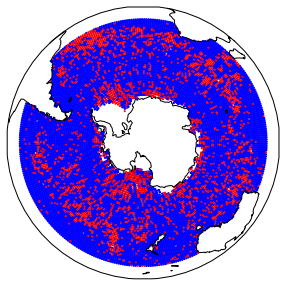

In [24]:
# Plot two regions
import cartopy
import cartopy.crs as ccrs
data_trans =  ccrs.PlateCarree()
fig = plt.figure(figsize=(5,5),facecolor='w')
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=0,central_latitude=-90.0))
ax.coastlines()
subX = X.loc[X['final_K'] == 2]
pp = ax.scatter(subX['lon'], subX['lat'], subX['final_K'], c= 'blue', transform=data_trans,vmin=-0.5, vmax=0.5)
subX = X.loc[X['final_K'] == 1]
pp = ax.scatter(subX['lon'], subX['lat'], subX['final_K'], c= 'red', transform=data_trans,vmin=-0.5, vmax=0.5)
#cbar = plt.colorbar(pp, orientation='horizontal')
#cbar.set_label(label='Correlation',size=14, family='serif')
plt.show()

Clustered regions show some similarity with the distribution of anomalies correlation

## Investigate changes in the cost function of K-means as result of varying the total number of centroids "K"

**Implementation of Kmean varying the K number of centroids**

In [25]:
# Implementation of Kmean varying the K number of centroids for a single month 
X = np.stack((sst_anom_z[:,:,10].flatten(),bbp_anom_z[:,:,1].flatten() \
           ,sst_data['lat'].flatten(),sst_data['lon'].flatten()),1)
X = np.stack((np.nanmean(sst_anom_z, axis = 2).flatten(),np.nanmean(bbp_anom_z, axis = 2).flatten() \
             ,sst_data['lat'].flatten(),sst_data['lon'].flatten()),1)
for n in range(len(X)):
    if np.isnan(X[n,0] + X[n,1]) == True:
        X[n,:] = float('nan')    
X = pd.DataFrame(X,columns = ['sst_anom','bbp_anom','lat','lon'])    
X = X.dropna()
cost_function = np.zeros(20)
cost_function[:] = np.nan
for n in range(20):
    km = KMeans(n_clusters=n+1).fit(X[['sst_anom','bbp_anom']])
    X[n] = km.labels_
    cost_function[n] = km.inertia_

/Users/laaq/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.


Plot of cost function

Text(0.5, 1.0, 'Change in K-means cost function with varying numberd of centroids (K)')

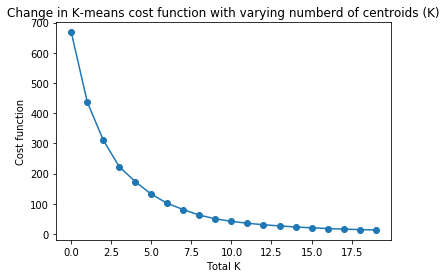

In [32]:
plt.plot(cost_function,'o-')
plt.ylabel('Cost function')
plt.xlabel('Total K')
plt.title('Change in K-means cost function with varying numberd of centroids (K)')

The cost function seems to decrease sharply until K ~ 7. However, the geographical clustering of new labels does not is noisy and does no represent any clear biohabitat or environmental regions (not shown)